In [1]:
# On Extreme Learning Machines (ELMs)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
X.shape #30 feat

(569, 30)

In [3]:
in_dim = X.shape[1]
hid_dim = 50
train_size = 0.7
rnd_idx = np.random.permutation(X.shape[0])
train_idx = rnd_idx[:int(train_size * X.shape[0])]
test_idx = rnd_idx[int(train_size * X.shape[0]):]
X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

In [4]:
W = np.random.rand(in_dim, hid_dim)

def σ(x):
    return 1/(1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def in_hidden(x, W): #compute input to hidden layer output
    out_ = np.dot(x, W)
    return ReLU(out_)

Regarding the least-square minimization of the weights on the output layer, we have the following solution:
$$
\boldsymbol{\hat\beta} = (\mathbf{X}^\intercal \mathbf{X})^{-1}\mathbf{X}^\intercal \mathbf{y}
$$

In [5]:
X_ = in_hidden(X_train, W) 
#Need pseudoinvert
β = np.dot(np.linalg.pinv(np.dot(X_.T, X_)), np.dot(X_.T, y_train))

def predict(x, W_hidden, W_out):
    out_ = in_hidden(x, W_hidden)
    y_ = np.dot(out_, W_out)
    return σ(y_)

In [6]:
y_pred_train = predict(X_train, W, β)
y_train_cor = (np.sum(y_train == np.where(y_pred_train > 0.5, 1, 0))/y_train.shape).item()

y_pred_test = predict(X_test, W, β)
y_test_cor = (np.sum(y_test == np.where(y_pred_test > 0.5, 1, 0))/y_test.shape).item()
print(f"Train acc: {y_train_cor:.4f}, Test acc: {y_test_cor:.4f}")

Train acc: 0.7487, Test acc: 0.7368


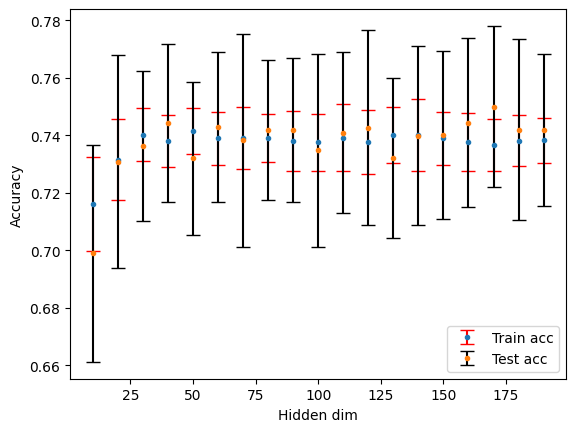

In [23]:
train_accs = []
test_accs = []
x_range = np.arange(10, 200, 10)

for hid_dim in x_range:
    train_acc = []
    test_acc = []
    for _ in range(25): # num of sims
        rnd_idx = np.random.permutation(X.shape[0])
        train_idx = rnd_idx[:int(train_size * X.shape[0])]
        test_idx = rnd_idx[int(train_size * X.shape[0]):]
        X_train = X[train_idx]
        y_train = y[train_idx]
        X_test = X[test_idx]
        y_test = y[test_idx]
        W = np.random.rand(in_dim, hid_dim)
        X_ = in_hidden(X_train, W) 
        #Need pseudoinvert
        β = np.dot(np.linalg.pinv(np.dot(X_.T, X_)), np.dot(X_.T, y_train))
        y_pred_train = predict(X_train, W, β)
        y_train_cor = (np.sum(y_train == np.where(y_pred_train > 0.5, 1, 0))/y_train.shape).item()
        train_acc.append(y_train_cor)
        
        y_pred_test = predict(X_test, W, β)
        y_test_cor = (np.sum(y_test == np.where(y_pred_test > 0.5, 1, 0))/y_test.shape).item()
        test_acc.append(y_test_cor)

    train_accs.append((np.mean(train_acc), np.std(train_acc)))
    test_accs.append((np.mean(test_acc), np.std(test_acc)))

train_μ, train_σ = zip(*train_accs)
test_μ, test_σ = zip(*test_accs)

plt.errorbar(x_range, train_μ, yerr=train_σ, fmt=".", capsize=5, capthick=1, ecolor="r", label="Train acc")
plt.errorbar(x_range, test_μ, yerr=test_σ, fmt=".", capsize=5, capthick=1, ecolor="k", label="Test acc")
plt.xlabel("Hidden dim")
plt.ylabel("Accuracy")
plt.legend()